## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [5]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


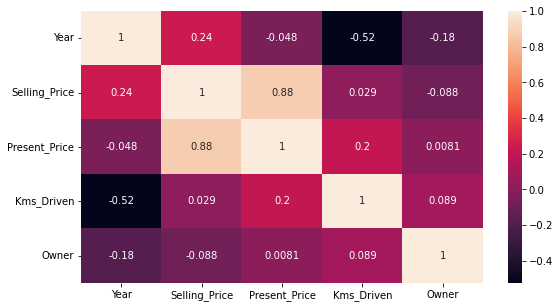

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df["vehicle_age"]=2021-df.Year

In [9]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
innova                        9
ciaz                          9
grand i10                     8
jazz                          7
Royal Enfield Classic 350     7
amaze                         7
sx4                           6
ertiga                        6
eon                           6
i10                           5
swift                         5
alto k10                      5
Bajaj Pulsar 150              4
dzire                         4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
Yamaha FZ S V 2.0             3
xcent                         3
etios cross                   3
TVS Apache RTR 160            3
Royal Enfield Thunder 500     3
creta                         3
Bajaj Avenger 220             3
Bajaj Pu

In [10]:
df.drop(columns=["Year"], inplace=True)

In [11]:
#df=pd.get_dummies(df, drop_first=True)

In [12]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Train test split

Categoric verileri numeric verilere donusturmek icin get_dummies yerine Encoder uyguluyoruz :

Encoder uygulamanin get_dummies' e gore sonuca cok buyuk bir etkisi olmasa da; calisma maliyeti ve feature importance acisindan ciddi degisikliklere neden olabilir.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [15]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [16]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.0,5.59,27000,2.0,0.0,1.0,0,7
1,93.0,9.54,43000,1.0,0.0,1.0,0,8
2,68.0,9.85,6900,2.0,0.0,1.0,0,4
3,96.0,4.15,5200,2.0,0.0,1.0,0,10
4,92.0,6.87,42450,1.0,0.0,1.0,0,7


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

max_depth=1' in regression modellerinde yetersiz oldugu gorulmus. Bu yuzden burada default degeri=3. Bu sayiyi daha da artirmak weak learner mantigina ters olur. 

AdaBoost Classifier ---> Base Estimator : DecisionTreeClassification(max_depth=1)

AdaBoost Regressor ---> Base Estimator : DecisionTreeRegressor(max_depth=3). Regression' da agaclanma cok oldugu icin tek denemelik bir agaclanma az gelmistir, bu yuzden default degeri 3' e cekilmistir. 

Bu modelde Logistic Regression ve SVM gibi modeller de kullanilabilir. Fakat en iyi sonuclari Tree base modellerde verir.  

In [20]:
from sklearn.ensemble import AdaBoostRegressor

In [21]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [22]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

AdaBoost' u default degerlerle calistirdigimizda train ve test skorlarinin birbirine yakin oldugunu goruyoruz. 

In [23]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.967360,0.938860
mae,0.730070,0.920171
mse,0.830186,1.641058
rmse,0.911145,1.281038


Cross Validate isleminden sonra 1.28 olan rmse degerinin 1.89 oldugunu; 0.93 olan R2 skorunun 0.83' e dustugunu goruyoruz. Demek ki bir overfitting durumu var. Skorlari iyilestirmek icin GridSearch yapmak gerekir.

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.835971
test_neg_mean_absolute_error       -1.116024
test_neg_mean_squared_error        -4.898089
test_neg_root_mean_squared_error   -1.892615
dtype: float64

Bu modelin calisma mantigini anlamak icin asagida 3 agacli bir model yaptik yaptik. Simdi bunlari inceleyelim ve asagida yorumlayalim:

In [25]:
from sklearn.tree import plot_tree

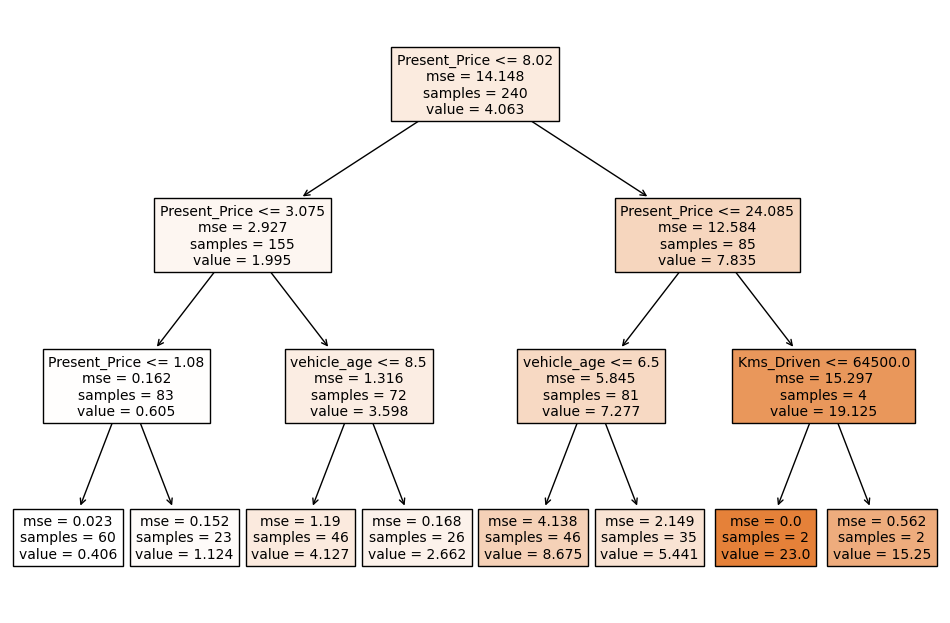

In [26]:
model = AdaBoostRegressor(random_state=101, n_estimators=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

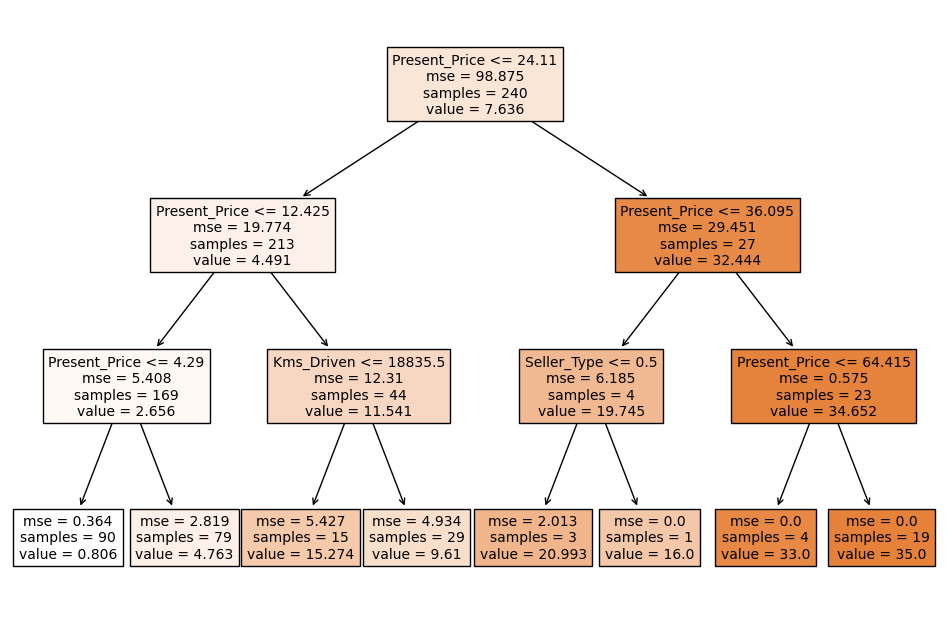

In [27]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

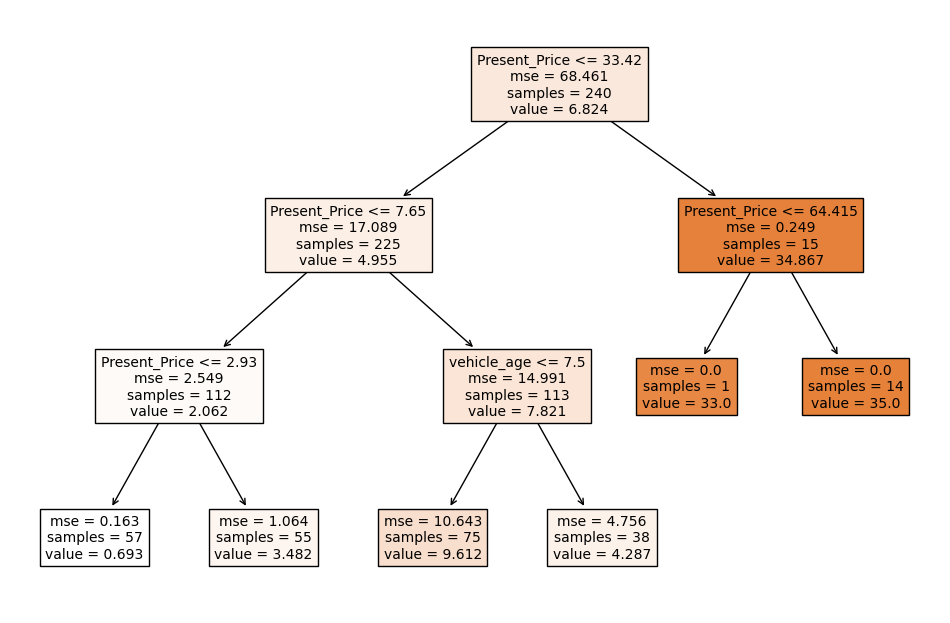

In [28]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

In [29]:
y_pred     # y_pred' den aldigimiz tahmin degerleri

array([ 5.44085714,  5.44085714,  4.12717391,  4.12717391,  4.12717391,
        9.61034483,  9.61034483,  0.69298246, 15.25      ,  4.12717391,
        5.44085714,  8.67478261,  4.12717391,  5.44085714,  0.69298246,
        4.12717391,  5.44085714,  0.69298246,  5.44085714,  0.69298246,
        5.44085714, 20.99333333, 20.99333333,  0.80633333,  3.48181818,
        4.12717391,  4.76253165,  8.67478261,  4.76253165,  5.44085714,
        4.12717391,  9.61034483,  4.12717391,  0.69298246,  0.69298246,
        4.76253165,  8.67478261,  4.12717391,  0.80633333,  3.48181818,
        0.69298246,  4.12717391,  9.61186667,  0.69298246,  0.80633333,
        4.12717391,  0.69298246,  8.67478261,  4.12717391,  4.76253165,
        4.12717391, 20.99333333,  4.28736842,  0.80633333,  0.69298246,
        0.69298246,  3.48181818,  0.69298246,  0.69298246,  0.69298246,
        0.69298246])

In [30]:
np.array(y_test)    # Gercek y degerleri

array([ 9.25,  9.65,  3.65,  6.  ,  2.9 ,  8.25,  6.25,  0.6 , 14.9 ,
        5.5 ,  5.5 ,  6.5 ,  3.45,  3.49,  0.45,  3.5 ,  7.05,  0.35,
        6.95,  0.4 ,  3.8 , 23.  , 18.75,  1.  ,  1.95,  4.5 ,  4.5 ,
        9.1 ,  5.8 ,  4.35,  5.25,  9.7 ,  5.4 ,  0.2 ,  0.38,  6.15,
        7.75,  4.9 ,  1.05,  1.35,  0.75,  4.8 , 19.75,  0.17,  1.11,
        4.75,  0.2 ,  8.35,  2.9 ,  4.5 ,  5.15, 20.75,  2.25,  1.1 ,
        0.35,  0.15,  3.  ,  0.3 ,  0.2 ,  0.75,  0.45])

In [31]:
X_test     # Yukarida tahmin edilen ilk degerin indexi 67 imis. Bu ornegi kullanacagiz.

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
67,81.0,20.450,59000,1.0,0.0,1.0,0,11
99,81.0,20.450,50024,1.0,0.0,1.0,0,11
266,64.0,7.000,35000,2.0,0.0,1.0,0,7
222,84.0,7.600,77632,1.0,0.0,1.0,0,7
24,96.0,4.410,56879,2.0,0.0,1.0,0,8
282,69.0,14.000,63000,1.0,0.0,1.0,0,7
279,69.0,13.600,40126,2.0,0.0,1.0,0,7
138,32.0,0.870,15000,2.0,1.0,1.0,0,5
50,81.0,30.610,104707,1.0,0.0,0.0,0,9
234,82.0,5.700,4492,2.0,0.0,1.0,0,6


In [33]:
X_test.loc[67]   

# Ilk siradaki gozlem 67. index' teydi. O satira ait tum bilgileri alalim :

Car_Name            81.00
Present_Price       20.45
Kms_Driven       59000.00
Fuel_Type            1.00
Seller_Type          0.00
Transmission         1.00
Owner                0.00
vehicle_age         11.00
Name: 67, dtype: float64

Yukaridaki agaclarda 67. indexdeki gozlemi tahmin etmeye calisalim.

__Ilk Agac --->__ Present_Price <= 8.02 mi? Hayir, sag daldan gider. Present_Price <= 24.085 mi? Evet sol daldan gider. vehicle_age <=6.5 mu? Haayir sagdan gider ve ilk agactaki sonuc __'value = 5.441'__  (Yani o dalda bulunan 35 arabanin ortalama fiyati 5.441 imis)

__Ikinci Agac --->__  Present_Price <= 24.11 mi? Evet, sol daldan gider.  Present_Price <= 12.425 mi? Hayir, sag daldan gider. Kms_Driven <= 18835.5 mi? Hayir, sag daldan gider ve ikici agactaki sonuc __'value = 9.61'__

__Ucuncu Agac --->__ Present_Price <= 33.42 mi? Evet, sol daldan gider.  Present_Price <= 7.65 mi? Hayir, sag daldan gider. vehicle_age <= 7.5 mi? Hayir, sag daldan gider ve ucuncu agactaki sonuc __'value = 4.287'__

Buldugumuz value sonuclarina gore y_pred' e tekrar bakalim. Ilk deger 67. indexe karsilik geliyordu ve degerine bakarsa 5.44; yukarida buldugumuz value' lar icinde ilk agactaki deger ile eslesiyor. Yani demek ki ilk agacin agirligi daha fazlaymis ve 3 deger icinden onu secmis.

Ikinci gozleme bakarsak o da ilk agaci vermis(5.44). Ucuncu gozlem 4.127 yukardaki agaclarda leaf degerlerine bakarsak bu deger de birinci agacta. Demek ki 3. gozlem de en fazla agirligi 1. agaca vermis. 

Yani bu modelde her gozlem icin agaclardan birine daha fazla agirlik verilir ve o alinir. (Random Forest' ta yukaridaki 3 value' yu toplayip 3' e boluyordu.)

!!! Aslinda 2. agacta cikan Present_Price bizim araba fiyatimiza daha yakin ama o agaci secmemis. Bunu sebebi; demek ki o agactaki araba fiyatlarinin ortalamasi 9.61 bile etse, arabalara tek tek baktigimizda bizim tahmin etmek istedigimiz fiyat ile arasinda fark var. Mesela diger araba fiyatlari 13, 15, 6, 7 olabilir. Zaten aralarindaki fiyat farkinin buyuk oldugunu varyansa yani squared_error' e bakarak da anlayabiliriz. Fiyat yakin gibi gorunse de varyans oldukca buyuk cikmis. 

squared_error=0 demek, o yapraktaki her arabanin fiyati tam bilinmis demektir.

Elimizdeki 5.44 degerini gercek degere yaklastirmak icin daha cok agaca ihtiyacimiz var. Ama datada gozlem sayisi az oldgu icin, bu sonuc bile basarili diyebiliriz.

In [34]:
y_pred

array([ 5.44085714,  5.44085714,  4.12717391,  4.12717391,  4.12717391,
        9.61034483,  9.61034483,  0.69298246, 15.25      ,  4.12717391,
        5.44085714,  8.67478261,  4.12717391,  5.44085714,  0.69298246,
        4.12717391,  5.44085714,  0.69298246,  5.44085714,  0.69298246,
        5.44085714, 20.99333333, 20.99333333,  0.80633333,  3.48181818,
        4.12717391,  4.76253165,  8.67478261,  4.76253165,  5.44085714,
        4.12717391,  9.61034483,  4.12717391,  0.69298246,  0.69298246,
        4.76253165,  8.67478261,  4.12717391,  0.80633333,  3.48181818,
        0.69298246,  4.12717391,  9.61186667,  0.69298246,  0.80633333,
        4.12717391,  0.69298246,  8.67478261,  4.12717391,  4.76253165,
        4.12717391, 20.99333333,  4.28736842,  0.80633333,  0.69298246,
        0.69298246,  3.48181818,  0.69298246,  0.69298246,  0.69298246,
        0.69298246])

## Gridsearch for Adaboosting

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [36]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [37]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [38]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 300}

In [39]:
grid_model.best_score_

-1.7870767870408986

Yukaridaki best_score' u, asagida Test setindeki rmse skoru ile kiyaslarsak asagidaki default degerlerin sonuclarina gore biraz daha dustugunu soyleyebiliriz ama overfitting durumu hala devam ediyor. Yani Adaboosting' in overfitting durumunu cozdugunu soyleyemeyiz. 

In [40]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.961240,0.939360
mae,0.830284,1.015983
mse,0.985835,1.627622
rmse,0.992892,1.275783


!!! !! Datamizda fiyati 35 olan ve 33 olan birer tane arac var. learning_rate ile oynayarak agaclarin son dallarindaki sample sayisina bakarsak learning_rate' i artirdikca, sample sayisinin da arttigini gorebiliriz. Bunun anlami; bilemedigi tahmini sonraki agaclarda agirliklandirarak tahmin etmeye calismasidir. Mesela learning_rate' i 0.5 yaptigimizda fiyati 35 olan aracin sample sayisinin 4 oldugunu goruyoruz. (Halbuki datada bir tane idi.) learning_rate' i cok artirmak demek, agirliklandirmanin cok olmasi demek ve modelin cok dallanmadan fiyat tahminlerini cok iyi yapmasi demektir. Bunun olmasini istemeyiz cunku bu da bizi overfitting' e goturur. AdaBoost overfitting' e gitmeye cok musaittir. 

## Feature importance

!! AdaBoosting' in feature importance' i, feature selection yaomak icin cok guvenilir degildir. 

In [41]:
model = AdaBoostRegressor(random_state=101,n_estimators=500, learning_rate=0.5)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=500, random_state=101)

In [42]:
model.feature_importances_

array([0.01408638, 0.83349813, 0.03292981, 0.01693637, 0.00109642,
       0.00269668, 0.00121041, 0.0975458 ])

In [43]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance')
ada_imp_feats

,ada_Importance
Seller_Type,0.001096
Owner,0.001210
Transmission,0.002697
Car_Name,0.014086
Fuel_Type,0.016936
Kms_Driven,0.032930
vehicle_age,0.097546
Present_Price,0.833498


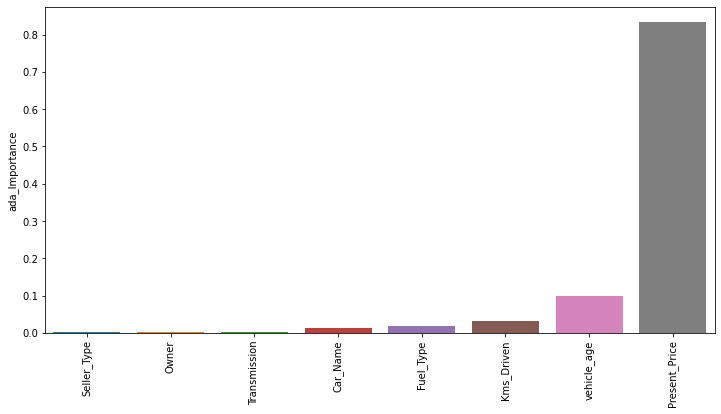

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')

plt.xticks(rotation=90);

## Gradient Boosting Regressor

Bu model, Classifier' de  olasiliklari minimize etmeye calisiyordu fakat burda fiyatlardaki residual' lari bulup (y-y_pred) onlari minimize etmeye calisacak.

Gercek ile tahmin arasindaki farki kapatmak yerine, aradaki residual degerleri alarak bunlari minimize etme uzerine calisir.

Kullanilan 'loss=squared_error' gibi parametreler onceki ile ayni. 

SUBSAMPLE ----> (Default=1) Cok buyuk datasetlerinde datanin icinden orneklem kumesi secmek icin kullanilir. Mesela subsample=0.1 dedigimizde datanin icinden %10' luk bir orneklem alir ve bu orneklem datanin tamamini temsil edecek bir orneklem kumesi olur.  Skorlar genele gore biraz dusse de maliyeti cok azaltir. 

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
grad_model = GradientBoostingRegressor(random_state=101)

Asagidaki ornekte  fiyati 100 lira ve 200 lira olan iki tane araba olsun. Bu iki arabanin ortalamasini alir. Iki ornekte de bu ortalamayi 150 olarak yazdik. Butun arabalar icin baslangic fiyati 150 olarak baslayacak.

ilk araba icin residual deger 100 - 150 = -50 olur. Ikinci araba icin residual degeri 200 - 150 = 50 olur. (Eksi cikmasi fiyat azalacak, arti cikmasi ile fiyat artacak demektir.)

Ilk arac agaca girdiginde residual degeri -30' a dusmus; ikinci arac ise agaca girdiginde residual degeri 25' e dusmus. 

learning_rate=0.1 default degeri ile residuallari carpar ilk fiyat olan 150 ile birlikte hepsini toplar. Ilk arac icin 100 degerini bulabilmek icin fiyati 150' den 100'e dusurmeye; ayni sekilde ikinci agacta da 200' e cikarmaya calisiyor. Her agacta bu degerler gercek degere biraz daha yaklasiyor. 

Classification' da olasiliklari azaltmaya calisiyordu, burda residuallari minimize etmeye calisarak fiyatlari gercek degere yaklastirmaya calisir.

In [47]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30) = 142

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25 = 162.5

In [48]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

Default degerler ile skorlari aldigimizda Train ve Test set skorlarinin AdaBoost' a gore birbirine daha yakin oldugunu goruyoruz. 

In [49]:
train_val(grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996501,0.970278
mae,0.217741,0.533569
mse,0.088991,0.797770
rmse,0.298314,0.893180


__Cross_Validate__

Cross Validate skorlarinda mean_squared_error' un 1.55 oldugunu; AdaBoost' taki sonuca gore daha dusuk oldugunu goruyoruz. Overfitting sorununu biraz cozdugunu soyleyebiliriz. 

In [50]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.890442
test_neg_mean_absolute_error       -0.751150
test_neg_mean_squared_error        -3.348033
test_neg_root_mean_squared_error   -1.552812
dtype: float64

## Gridsearch for Gradientboosting

In [51]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [52]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [53]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [54]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 4,
 'n_estimators': 300,
 'subsample': 0.8}

In [55]:
grid_model.best_score_

-1.3604843443220447

Grid modelin CrossValidate'ine a't best_score -1.36 cikmis. Yani GridSearch isleminden sonra skorlar biraz daha iyilesti. 

Grid model sonra asagidaki rmse degeri 1.108 olmus. Bu GridSearch isleminden onceki skora gore biraz daha artti ama best_score' a gore aradaki farki daha da kapatti. Overfittin sorununu neredeyse tamamen giderdigimizi soyleyebiliriz. Test skorlarimiz biraz kotulesti ama bizim icin onemli olan datanin genelleyebilmesidir. 

GradientBoosting' in, AdaBoost' a gore overfittiong' i engellemede daha basarili oldugunu soyleyebiliriz.

In [56]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996280,0.95419
mae,0.228673,0.58534
mse,0.094620,1.22957
rmse,0.307604,1.10886


In [57]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.911073
test_neg_mean_absolute_error       -0.720990
test_neg_mean_squared_error        -2.572960
test_neg_root_mean_squared_error   -1.360484
dtype: float64

## Feature importance

In [58]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=0.8)

In [59]:
model.feature_importances_

array([9.12937722e-02, 7.35751195e-01, 3.21390246e-02, 5.25140122e-02,
       1.35299779e-02, 2.01178997e-02, 2.58794909e-04, 5.43953234e-02])

In [60]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance')
grad_imp_feats

,grad_Importance
Owner,0.000259
Seller_Type,0.013530
Transmission,0.020118
Kms_Driven,0.032139
Fuel_Type,0.052514
vehicle_age,0.054395
Car_Name,0.091294
Present_Price,0.735751


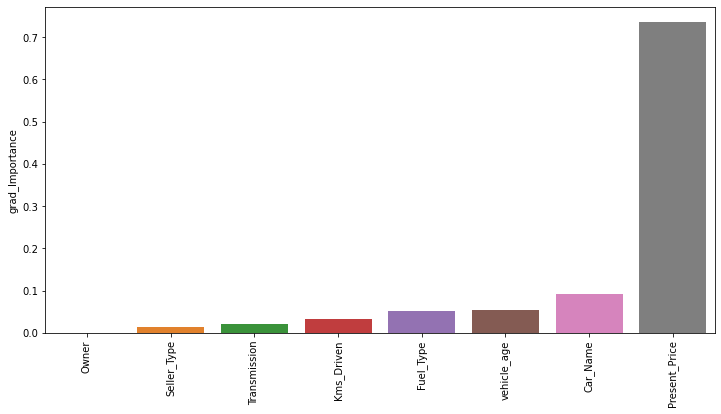

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [62]:
#!pip install --upgrade pip

In [63]:
#!pip install xgboost

In [64]:
from xgboost import XGBRegressor

In [65]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"

objective="reg:linear" olarak biraksak da ayni sonucu verir ama yeni surumde bu deger objective="reg:squarederror" olarak guncellendigi icin boyle yazdik. objective="reg:linear" olarak biraksak da ayni sonucu aliriz saadce uyari verir.

Buradaki parametrelerimiz de Classification ile ayni sadece min_child_weight=1 ile oynayarak ; gamma=0, 0 ile 1 arasinda degerler alir bununla oynayarak overfitting ile mucadele edebiliriz. 

subsample=1, tum datayi mi alsin yoksa datayi temsilen orneklem mi alsin diyebiliriz. colsample_bytree=1, max_feature ozelligi yerine kullanilan parametre. 

colsample_bylevel=1, subsamlpe ile oynaniyor ise bu degerle oynanmasi tavsiye edilmez. 

colsample_bynode=1, en dipte kalan yaprak sayilarini oransal olarak ayarlayabiliriz fakat bununla oynamak da max_depth'e gore cok zahmetlidir.

reg_alpha=0, 0 yerine 1 dersek lasso gibi davranirreg_lambda=1 ridge gibi davranir ve bu degerlerle oynayarak overfitting ile mucadele edilebilir. 

scale_pos_weight=1 sinif dengesizligi icin kullanilan bir parametredir. Fakat bu, binary dengesizlikler icin kullanilir. Class sayisi 2' den fazla ise bu parametre ile oynamanin etkisi olmaz. Multiclass datalarda scikit-learn' in 'Class Weight' denen bir fonksiyonu var bu kullanilir. (Proje2' de kullanildi.) 

In [66]:
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

Datamiz bu modelle egitildikten sonra yukaridaki tum modellere kiyasla sonuclarimiz burada daha iyi cikti. rmse degerlerine baktigimizda train set degeri biraz yukselmis, test set degeri biraz dusmus. Yani birbirlerine biraz daha yaklasmislar. 

In [67]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.994422,0.967460
mae,0.269524,0.539928
mse,0.141870,0.873393
rmse,0.376657,0.934555


In [68]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.899077
test_neg_mean_absolute_error       -0.725835
test_neg_mean_squared_error        -2.904931
test_neg_root_mean_squared_error   -1.461227
dtype: float64

## Gridsearch for XGBoost

In [69]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [70]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [71]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [72]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.5}

In [73]:
grid_model.best_score_

-1.1771591438195685

GridSearch sonrasi da best_score 1.17 ye kadar gelmis ve asagida test set rmse skoru olan 0.84 ile de birbirine oldukca yaklasmis. 

In [74]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999791,0.973263
mae,0.054037,0.507799
mse,0.005328,0.717641
rmse,0.072994,0.847137


XGBoost' un Regularization' da diger modellere gore daha iyi bir skor elde ettigini soyleyebiliriz. 

## Feature importance

!! Feature importance' da en iyi XGBoost' tur. !!

In [75]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.2, max_dept=6, subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.2, max_dept=6, objective='reg:squarederror',
             random_state=101, subsample=0.5)

In [76]:
model.feature_importances_

array([0.08059955, 0.6419647 , 0.03368963, 0.07816733, 0.00611593,
       0.00832384, 0.00128312, 0.14985596], dtype=float32)

In [77]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
Owner,0.001283
Seller_Type,0.006116
Transmission,0.008324
Kms_Driven,0.033690
Fuel_Type,0.078167
Car_Name,0.080600
vehicle_age,0.149856
Present_Price,0.641965


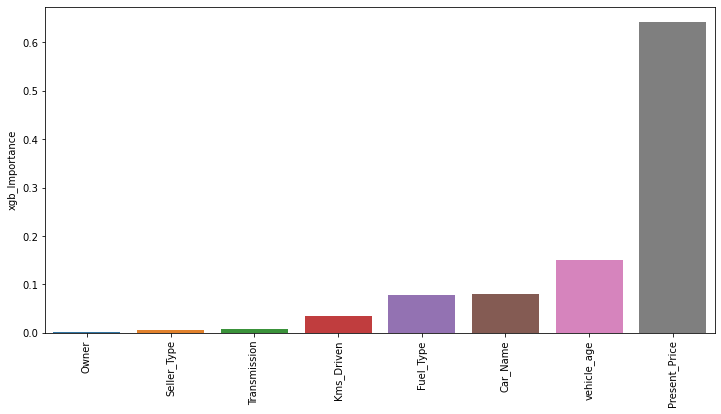

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

## Feature importance comparison

Kullandigimiz tum modellerin feature importance' larini kiyaslarsak; XGBoost' un digerlerine gore daha iyi bir agirliklandirma yaptigini gorebiliriz. Boosting modellerde XGBoost' un feature importance' ini kullanmak sagliklidir. 

In [79]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_Importance,grad_Importance,xgb_Importance
Seller_Type,0.001096,0.013530,0.006116
Owner,0.001210,0.000259,0.001283
Transmission,0.002697,0.020118,0.008324
Car_Name,0.014086,0.091294,0.080600
Fuel_Type,0.016936,0.052514,0.078167
Kms_Driven,0.032930,0.032139,0.033690
vehicle_age,0.097546,0.054395,0.149856
Present_Price,0.833498,0.735751,0.641965


## New model

XGBoost' un en onemli iki feature importance' ini secerek yeni bir model olusturduk ve yeni bir model kurup egittik :

In [80]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [81]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.59
1,8,9.54
2,4,9.85
3,10,4.15
4,7,6.87


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [83]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [84]:
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [85]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991681,0.948123
mae,0.307787,0.770614
mse,0.212689,1.311378
rmse,0.461183,1.145154


In [86]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.886573
test_neg_mean_absolute_error       -0.666894
test_neg_mean_squared_error        -2.357701
test_neg_root_mean_squared_error   -1.297375
dtype: float64

## Gridsearch for new XGBoost model

In [87]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [88]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [89]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [90]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [91]:
grid_model.best_score_

-1.193325439318438

XGBoost' un en onemli iki feature' i ile kurdugumuz yeni modelde best_score' un oldukca dustugunu goruyoruz. Asagida rmse skorlarina baktigimizda da train ve test set skorlarinin birbirine daha cok yaklastigini goruyoruz. 9 feature yerine 2 feature ile daha iyi skor aldigimiz icin bu modelle yola devam etmek mantikli olur.  Eger amac tum feature' lardan inside elde etmek ise tum feature' lar da kullanilabilir. Mesela saglik ile ilgili datalarda tum feature' lar onem arzedebilir. Bu durum amaca gore degiskenlik gosterir. 

In [92]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992991,0.960710
mae,0.284564,0.661908
mse,0.179196,0.993194
rmse,0.423315,0.996591


XGBoost diger modellere gore cok daha iyi sonuclar cikardi fakat bu durum her zaman boyle olmayabilir; gercek dunya verilerinde skorlarin kotu oldugu durumlar ile de karsilasabiliriz.